### Question to answer: How much do different Data jobs and skills pay? Specifically, what about Data Science roles and skills?

In one of the previous sections we found the most-demanded data jobs. Now, among these, we evaluate the median salary for each individually. Next, we evaluate the median salary per skill for Data Science roles. Finally, we visualize the highest paying and most demanded skills.

### Median Salaries of Top Data Jobs

In [8]:
#Importing libraries and data, cleaning data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

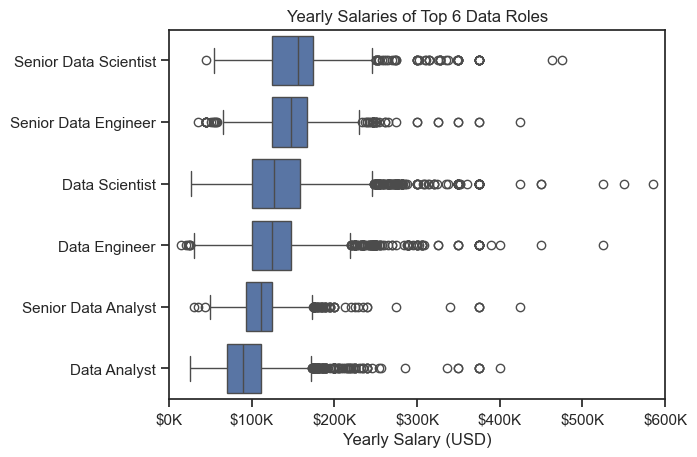

In [9]:
df = df.dropna(subset=['salary_year_avg'])
top_6_jobs = df['job_title_short'].value_counts().index[:6].to_list()
df_top_6 = df[df['job_title_short'].isin(top_6_jobs)]
jobs_sorted = df_top_6.groupby('job_title_short')['salary_year_avg'].agg('median').sort_values(ascending=False).index.to_list()

sns.boxplot(data=df_top_6, x='salary_year_avg', y='job_title_short', order=jobs_sorted)
sns.set_theme(style='ticks')

plt.title("Yearly Salaries of Top 6 Data Roles")
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')

plt.gca().xaxis.set_major_formatter(lambda x, pos: f'${int(x/1000)}K')
plt.xlim(0,600e3)
plt.savefig('images/04_Salary_Top_6_Data_roles.png', bbox_inches='tight')
plt.show()

### Most popular and highest-paying Data Science skills

In [10]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.explode('job_skills')
df_DS_top_10_pay = df_DS.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False).head(10)
df_DS_top_count = df_DS.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False).head(10)

In [11]:
df_DS_top_10_pay

,count,median
job_skills,,
asana,8,244500.0
airtable,7,215500.0
watson,14,209250.0
ruby on rails,5,195500.0
redhat,1,189500.0
hugging face,18,177000.0
lua,1,170500.0
solidity,5,165000.0
objective-c,1,164500.0


In [12]:
df_DS_top_count

,count,median
job_skills,,
python,4309,130500.0
sql,3146,132500.0
r,2484,125000.0
tableau,1279,125000.0
sas,1226,119000.0
aws,1021,132500.0
spark,944,135000.0
tensorflow,637,140000.0
azure,627,127500.0


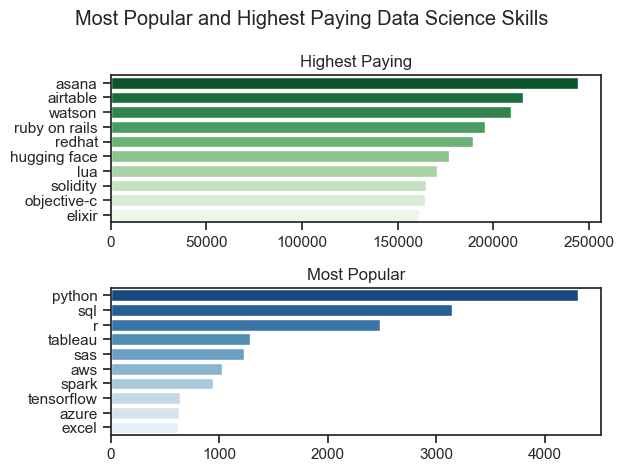

In [13]:
fig, ax = plt.subplots(2, 1)  
sns.set_theme(style='ticks')

sns.barplot(data=df_DS_top_10_pay, x='median', y='job_skills', ax=ax[0], hue='job_skills', palette='Greens_r') 
sns.barplot(data=df_DS_top_count, x='count', y='job_skills', ax=ax[1], hue='job_skills', palette="Blues_r")

ax[0].set_title('Highest Paying')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

ax[1].set_title('Most Popular')
ax[1].set_ylabel('')
ax[1].set_xlabel('')

fig.suptitle("Most Popular and Highest Paying Data Science Skills")
fig.tight_layout()
plt.savefig('images/04_Most_Popular_and_Highest_Paying_Skills.png', bbox_inches='tight')
plt.show()